In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 3. Data cleaning and preprocessing (1 point)
This should be self-explanatory. In an appropriate notebook (probably different than your previous one), explore different ways to clean and preprocess the dataset.

This is still part of your research. That is, don't be afraid to _try out different approaches to the same problem_. E.g., if you have a lot of missing values, you may not know right away how to handle them. Experimenting with several approaches will give you a better indication what works well for your data and goals.

In [16]:
df = pd.read_pickle("df1.pkl")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [17]:
new_column_names = []

for name in df.columns:
    current_upper = True
    new_name = ''
    for ch in name:
        if ch.isupper() and current_upper == False:
            new_name += '_'
            current_upper = True
        if ch.islower() and current_upper == True:
            current_upper = False
        new_name += ch.lower()
    
    new_column_names.append(new_name)

df.columns = new_column_names
df.columns

Index(['patient_id', 'age', 'gender', 'ethnicity', 'education_level', 'bmi',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever',
       'gastroesophageal_reflux', 'lung_function_fev1', 'lung_function_fvc',
       'wheezing', 'shortness_of_breath', 'chest_tightness', 'coughing',
       'nighttime_symptoms', 'exercise_induced', 'diagnosis',
       'doctor_in_charge'],
      dtype='object')

In [18]:
df.isna().sum()

patient_id                 0
age                        0
gender                     0
ethnicity                  0
education_level            0
bmi                        0
smoking                    0
physical_activity          0
diet_quality               0
sleep_quality              0
pollution_exposure         0
pollen_exposure            0
dust_exposure              0
pet_allergy                0
family_history_asthma      0
history_of_allergies       0
eczema                     0
hay_fever                  0
gastroesophageal_reflux    0
lung_function_fev1         0
lung_function_fvc          0
wheezing                   0
shortness_of_breath        0
chest_tightness            0
coughing                   0
nighttime_symptoms         0
exercise_induced           0
diagnosis                  0
doctor_in_charge           0
dtype: int64

In [19]:
df.doctor_in_charge.unique()

array(['Dr_Confid'], dtype=object)

In [20]:
df.drop(columns=['doctor_in_charge'], inplace=True)

In [21]:
df

,patient_id,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,...,gastroesophageal_reflux,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,0,3.470589,3.067944,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,0,3.125249,5.166032,0,1,0,0,0,1,1
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,0,1.132977,5.509502,0,0,0,1,1,0,1
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,0,1.685962,3.346877,1,0,1,1,0,1,1
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,1,3.481549,1.713274,0,1,1,0,1,1,0


In [22]:
mean_values = df.mean(axis=0)
mean_values = mean_values[1:]
mean_values

age                        42.137960
gender                      0.493311
ethnicity                   0.669732
education_level             1.307274
bmi                        27.244877
smoking                     0.141722
physical_activity           5.051786
diet_quality                5.022867
sleep_quality               7.019012
pollution_exposure          5.013030
pollen_exposure             5.114221
dust_exposure               4.981864
pet_allergy                 0.165970
family_history_asthma       0.301003
history_of_allergies        0.399247
eczema                      0.191890
hay_fever                   0.253344
gastroesophageal_reflux     0.158027
lung_function_fev1          2.548564
lung_function_fvc           3.741270
wheezing                    0.596154
shortness_of_breath         0.500418
chest_tightness             0.503344
coughing                    0.503344
nighttime_symptoms          0.602425
exercise_induced            0.604933
diagnosis                   0.051839
d

In [23]:
mean_df = pd.DataFrame({'category': mean_values.keys(), 'mean_value': [v for v in mean_values]})
mean_df

,category,mean_value
0,age,42.137960
1,gender,0.493311
2,ethnicity,0.669732
3,education_level,1.307274
4,bmi,27.244877
5,smoking,0.141722
6,physical_activity,5.051786
7,diet_quality,5.022867
8,sleep_quality,7.019012
9,pollution_exposure,5.013030


### Problem 4. Exploratory data analysis (1 point)
This step may, or may not, happen in unison with the previous one. Your goal is to understand the data distributions, relationships, useful features, maybe create visualizations and inform your data cleaning process.

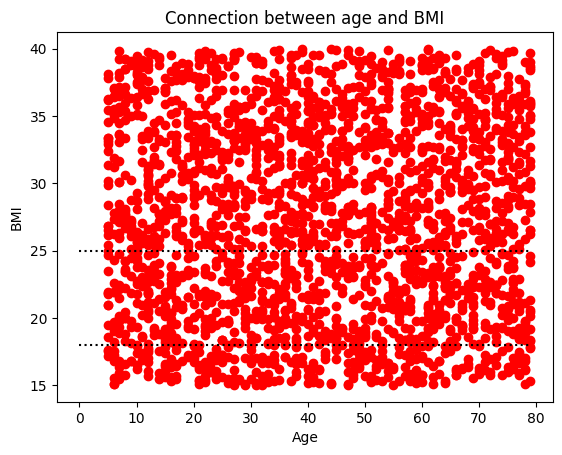

In [42]:
plt.scatter(df.age, df.bmi, color='r')
plt.plot([18 for _ in range(0, 80)], color='black', linestyle='dotted')
plt.plot([25 for _ in range(0, 80)], color='black', linestyle='dotted')
plt.title('Connection between age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()